# Two theta conversion 

*The two theta angle values of diffraction patterns depend on the wavelength of x-ray source that has been used. Here is a function for calculating the pattern shift from one wavelength to another.*  

In [2]:
import numpy as np 
from glob import glob
from pymatgen.core import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt 

Here is the function `two_theta_shift()`. 

In [3]:
def two_theta_shift(ptrn_x, ptrn_y, old_wavelength, new_wavelength, verbose=True): 
    '''Shift `x` two theta pattern angles (in degrees) from `old_wavelength` to `new_wavelength` (in Angstroms). 
    
    Mask invalid angles that would be shifted beyond 180 degrees.'''

    ratio = new_wavelength / old_wavelength
    z = ratio * np.sin(np.deg2rad(ptrn_x) / 2)
    is_valid = z < 1
                
    new_x = 2 * np.rad2deg(np.arcsin(z[is_valid]))
    new_y = ptrn_y[is_valid]

    if verbose: 
        n_invalid = np.sum(~is_valid)
        print(f'Discarding {n_invalid} angles.')

    return new_x, new_y



And here is the comparison between the directly calculated and wavelength shifted pattern. 

In [5]:
s = Structure.from_file('../../data/AMCSD-data/amscd-cif-files/Greenockite_0011540.cif')

synchrotron_wavelength = 9.510908054342373e-1 # as reported in json AND CONVERTED TO Angstroms!!! 
synchrotron_pattern = XRDCalculator(wavelength=synchrotron_wavelength).get_pattern(s)

Cu_wavelength = 1.540884610730401 # Angstroms 
Cu_pattern = XRDCalculator(wavelength=Cu_wavelength).get_pattern(s)

new_x, new_y = two_theta_shift(synchrotron_pattern.x, synchrotron_pattern.y, synchrotron_wavelength, Cu_wavelength)

Discarding 23 angles.


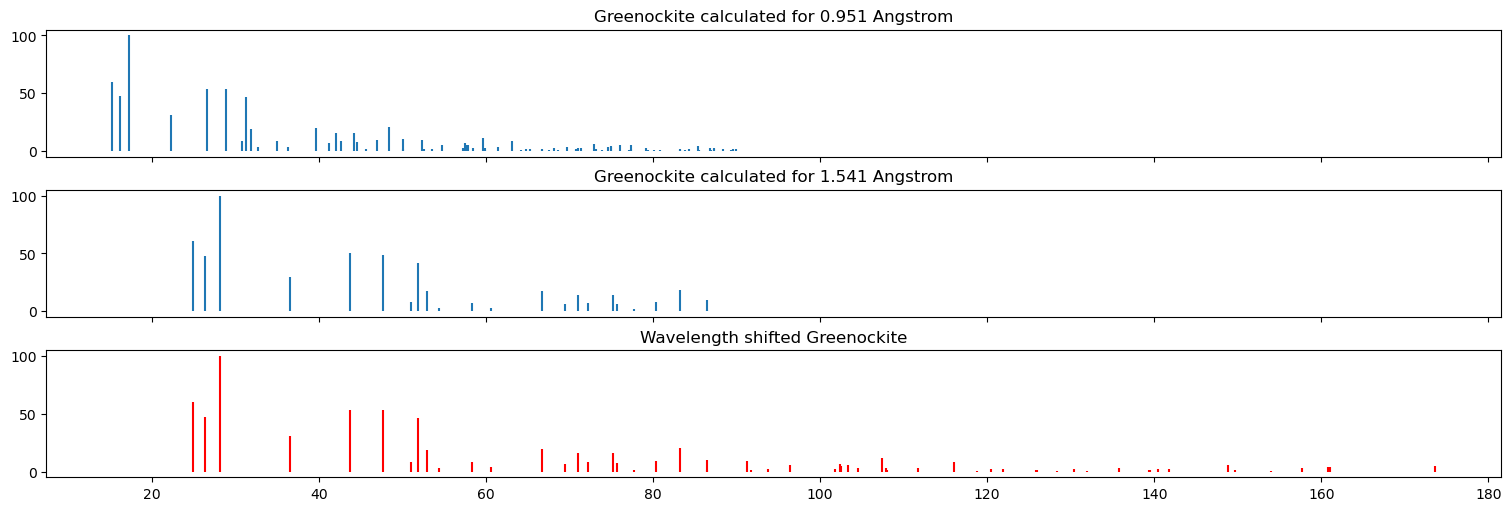

In [7]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=[15, 5], layout='compressed')
ax0, ax1, ax2 = axs.flatten()
ax0.vlines(synchrotron_pattern.x, np.zeros_like(synchrotron_pattern.y), synchrotron_pattern.y)
ax0.set_title(f'Greenockite calculated for {synchrotron_wavelength:0.3f} Angstrom')


ax1.vlines(Cu_pattern.x, np.zeros_like(Cu_pattern.y), Cu_pattern.y)
ax1.set_title(f'Greenockite calculated for {Cu_wavelength:0.3f} Angstrom')


ax2.vlines(new_x, np.zeros_like(new_y), new_y, color='r')
ax2.set_title('Wavelength shifted Greenockite');